In [ ]:
# Importing all libraries needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from google.colab import drive
import statsmodels.api as sm
from sklearn.metrics import r2_score

drive.mount ('/content/gdrive')
df=pd.read_excel ('/content/gdrive/My Drive/python/car_sales_train.xlsx')
data = np.array(df)

header = df.columns
initial_header = header

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Changing null or NaN to average by column
for i in range(14):
  column = data[:, i]
  if i >= 3:
    sum = 0
    count = 0
    for number in column:
      if math.isnan(number):
        continue
      if isinstance(number, int) or isinstance(number, float):
        sum += number
        count += 1
      else:
        print(number)
    average = round(sum / count, 2)
    for j in range(len(column)):
      if math.isnan(column[j]):
        data[j][i] = average

df = pd.DataFrame(data, columns = header)
df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,Acura,Integra,16919,1636,0,215,1.8,140,101.2,67.3,172.4,2639,13.2,28
1,Acura,TL,39384,19875,0,284,3.2,225,108.1,70.3,192.9,3517,17.2,25
2,Acura,CL,14114,18225,0,12678.1,3.2,225,106.9,70.6,192,347,17.2,26
3,Acura,RL,8588,29725,0,42,3.5,210,114.6,71.4,196.6,385,18,22
4,Audi,A4,20397,22255,0,2399,1.8,150,102.6,68.2,178,2998,16.4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,NaN,10045.9,0,244,1.9,160,100.5,67.6,176.6,3042,15.8,25
153,Volvo,S70,NaN,10045.9,0,275,2.4,168,104.9,69.3,185.9,3208,17.9,25
154,Volvo,V70,NaN,10045.9,0,288,2.4,168,104.9,69.3,186.2,3259,17.9,25
155,Volvo,C70,NaN,10045.9,0,455,2.3,236,104.9,71.5,185.7,3601,18.5,23


In [ ]:
# Getting a correlation array (y <-> x1, x2, ..., xn)  
activedata = data[:99,:]
active_y = activedata[:, 2]

unactive_data = data[99:, :]

corr_array = []
for i in range(3, 12):
  correlation = np.corrcoef(activedata[:, i].astype(float), active_y.astype(float))[0, 1]
  corr_array.append(correlation)

# Deleting columns from dataset which have a very low corellation
todelete = []
pos = 3
for corr in corr_array:
  if abs(corr) < 0.2:
    todelete.append(pos)
  pos += 1
todelete.reverse()
for item in todelete:
  activedata = np.delete(activedata, item, axis=1)
  header = np.delete(header, item)

df = pd.DataFrame(activedata, columns = header)


# DataFrame which we are going to work with looks like this:

In [ ]:
df

,manufact,model,sales,type,wheelbas,width,length,fuel_cap,mpg
0,Acura,Integra,16919,0,101.2,67.3,172.4,13.2,28
1,Acura,TL,39384,0,108.1,70.3,192.9,17.2,25
2,Acura,CL,14114,0,106.9,70.6,192,17.2,26
3,Acura,RL,8588,0,114.6,71.4,196.6,18,22
4,Audi,A4,20397,0,102.6,68.2,178,16.4,27
...,...,...,...,...,...,...,...,...,...
94,Mercedes-Benz,S-Class,16774,0,121.5,73.1,203.1,23.2,21
95,Mercedes-Benz,SL-Class,3311,0,99,71.3,177.1,21.1,20
96,Mercedes-Benz,SLK,7998,0,94.5,67.5,157.9,15.9,26
97,Mercedes-Benz,SLK230,1526,0,94.5,67.5,157.3,14,27


P-values of the model:
0.0024985814585116745
0.013034921738876373
0.0006662835366505607
0.14566662757598678
0.2536276935186584
0.003441869476932451
0.7036307431286778
R^2: 0.3256900585736946


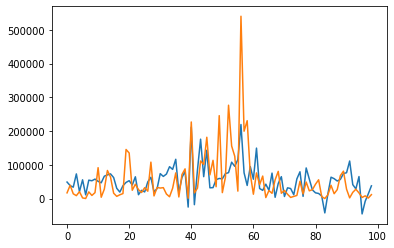

In [ ]:
# First model
activedata = np.array(activedata)
Y = np.array(activedata[:,2], dtype=float)
Y1 = np.array(activedata[:,2], dtype=float)
X = sm.add_constant(np.array(activedata[:,3:], dtype=float))
X1 = sm.add_constant(np.array(activedata[:,3:], dtype=float))
model = sm.OLS(Y, X)
results = model.fit()
prediction = results.predict(X1)

print('P-values of the model:')
for i in results.pvalues:
  print(i)

new_plot = []
for i in range(len(prediction)):
  new_plot.append([prediction[i], Y1[i]])
  
print('R^2:', results.rsquared)
plt.plot(new_plot)

# P-value of x6 is 0.70 which is way too large. So we are going to delete it and build another model without it.

In [ ]:
print('\n\nDeleting x3, x4, x6 and refitting the model')

# Deleting columns again to get rid of bad pvalue columns
X_columns = np.array(activedata[:,3:], dtype='float')
to_delete = [5]
to_delete.reverse()
for item in to_delete:
  X_columns = np.delete(X_columns, item, axis = 1)
  header = np.delete(header, item)




Deleting x3, x4, x6 and refitting the model


P-values of the new model:
0.0004429400716810411
0.012804144256105937
0.0002479270714638006
0.15427885103373112
0.20524992609012507
0.0001229871138183881
R^2: 0.32462269874118477


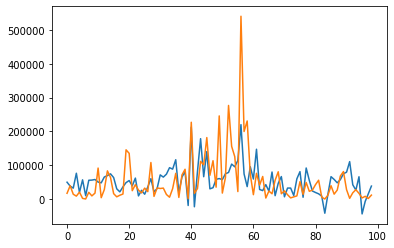

In [ ]:
# Second model
X = sm.add_constant(X_columns)
X1 = sm.add_constant(X_columns)
model = sm.OLS(Y, X)
results = model.fit()
prediction = results.predict(X1)
print('P-values of the new model:')
for i in results.pvalues:
  print(i)


new_plot = []
for i in range(len(prediction)):
  new_plot.append([prediction[i], Y1[i]])

new_plot = np.array(new_plot)

print('R^2:', results.rsquared)
plt.plot(new_plot)

# Model has a pretty low R^2, but we are going to use it to predict other values anyway, as this R^2 is the highest we could get.




In [ ]:
data = pd.DataFrame(data, columns=initial_header)

data = data.drop(["manufact", "model", "sales", "resale", "price", "engine_s", "horsepow", "mpg", "curb_wgt"], axis=1)

X_new = np.array(data)
data

,type,wheelbas,width,length,fuel_cap
0,0,101.2,67.3,172.4,13.2
1,0,108.1,70.3,192.9,17.2
2,0,106.9,70.6,192,17.2
3,0,114.6,71.4,196.6,18
4,0,102.6,68.2,178,16.4
...,...,...,...,...,...
152,0,100.5,67.6,176.6,15.8
153,0,104.9,69.3,185.9,17.9
154,0,104.9,69.3,186.2,17.9
155,0,104.9,71.5,185.7,18.5


In [ ]:
X_new = sm.add_constant(X_new)
Y_new = results.predict(X_new)

Y_new = np.array(Y_new)
X_new = np.delete(X_new, 0, axis=1)
result = np.column_stack((X_new, Y_new))

df = pd.DataFrame(result , columns=["type", "wheelbas", "width", "length",	"fuel_cap", "sales_predicted"])
df.to_excel("output.xlsx",
             sheet_name='Sheet_name_1')  
